In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import approximation
import random

Пункт a) Prove that G∗ is planar by drawing it on a plane without an intersection of edges.

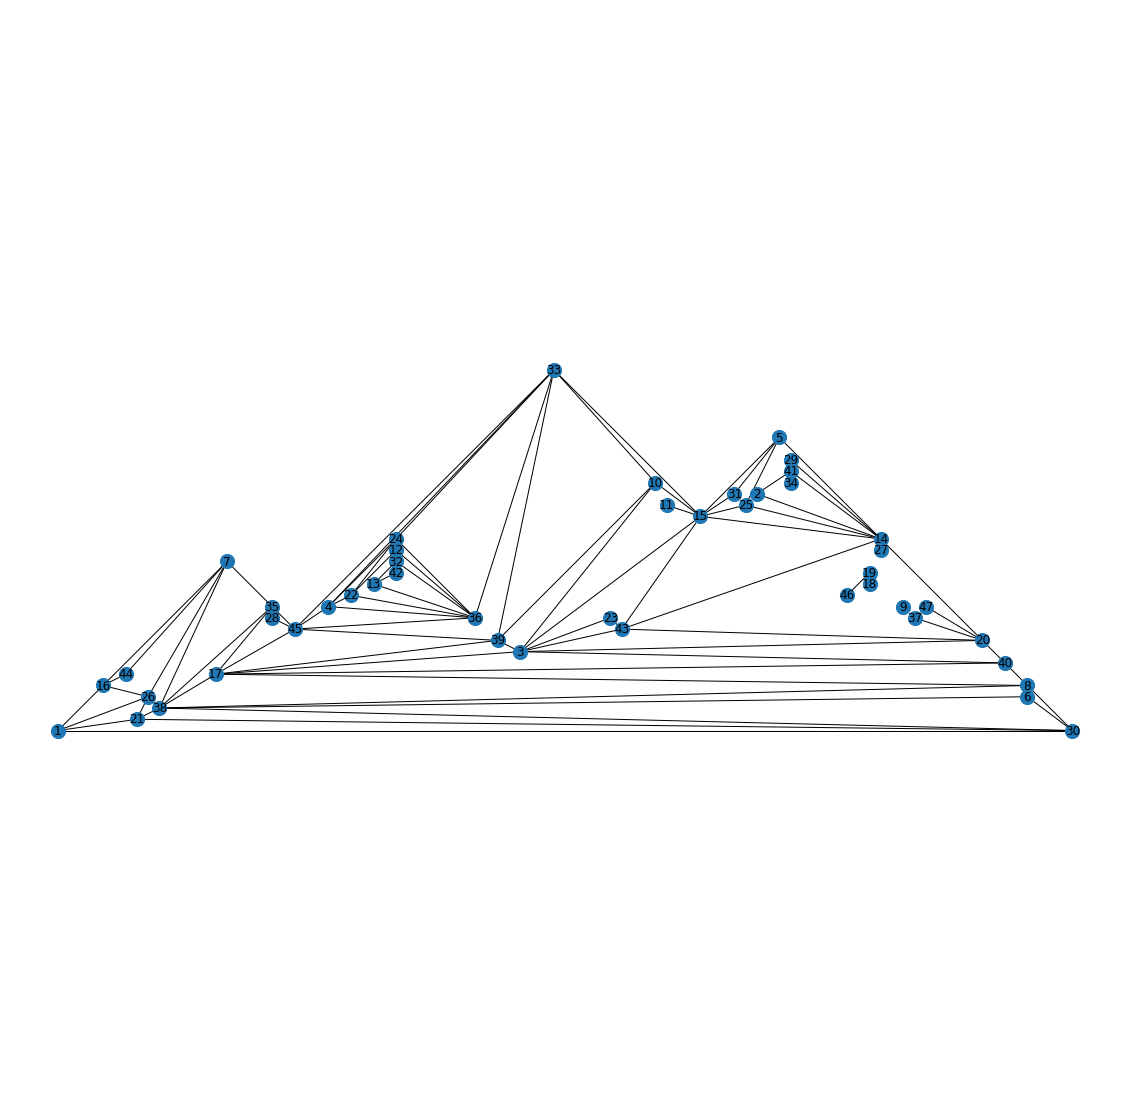

In [39]:
G = nx.Graph()
for i in range(1, 48):
    G.add_node(str(i))
fin = open("Country edges.txt", "r")
fin2 = open("Countries.txt", "r")
country = []
for i in range(1, 48):
    country.append(tuple(fin2.readline().split()))
for i in range(88):
    a, b = map(str, fin.readline().split())
    G.add_edge(a, b)
pos = nx.planar_layout(G)
plt.figure(figsize=(20,20))
plt.axis('equal')
nx.draw(G,pos, with_labels=True, node_size=200)
plt.show()

Пункт b) Find |𝑉|, |𝐸|, 𝛿 (G), Δ(G), rad(G), diam(G), girth(G), center(G), 𝜅(G), 𝜆(G).

In [3]:
G_component = G.subgraph(max(nx.connected_components(G), key=len))
print('|V| = {}'.format(G.number_of_nodes()))
print('|E| = {}'.format(G.number_of_edges()))
print('|V| = {}'.format(G_component.number_of_nodes()))
print('|E| = {}'.format(G_component.number_of_edges()))
print('𝛿(G) = {}'.format(min(G_component.degree, key=lambda i: i[1])[1]))
print('Δ(G) = {}'.format(max(G_component.degree, key=lambda i: i[1])[1]))
print('rad(G) = {}'.format(nx.radius(G_component)))
print('diam(G) = {}'.format(nx.diameter(G_component)))
print('girth(G) = {}'.format(len(min(nx.cycle_basis(G_component),key=len))))
print('center(G) = {}'.format(nx.center(G_component)))
print('𝜅(G) = {}'.format(approximation.node_connectivity(G_component)))
print('𝜆(G) = {}'.format(nx.edge_connectivity(G_component)))

|V| = 47
|E| = 88
|V| = 42
|E| = 87
𝛿(G) = 1
Δ(G) = 9
rad(G) = 5
diam(G) = 8
girth(G) = 3
center(G) = ['3', '4', '8', '10', '15', '17', '33', '36', '39', '40', '43', '45']
𝜅(G) = 1
𝜆(G) = 1


Пункт c) Find the minimum vertex coloring 𝑍 : 𝑉 → N of G.

In [4]:
Z = nx.coloring.greedy_color(G_component)
print(Z)

{'15': 0, '3': 1, '14': 1, '36': 0, '38': 0, '17': 2, '33': 1, '45': 3, '20': 0, '4': 2, '7': 1, '8': 1, '26': 2, '30': 2, '35': 4, '39': 0, '43': 2, '1': 0, '5': 2, '10': 2, '16': 3, '21': 1, '22': 1, '24': 3, '40': 3, '6': 3, '13': 1, '25': 3, '32': 2, '41': 0, '2': 2, '12': 2, '23': 0, '28': 0, '31': 1, '42': 0, '44': 0, '11': 1, '29': 0, '34': 1, '37': 1, '47': 1}


4 цвета: 0, 1, 2, 3;
Раскраска из 3 цветов невозможна, так как подграф из вершин (1, 7, 16, 21, 26, 38) нельзя раскрасить в 3 цвета

Пункт d) Find the minimum edge coloring 𝑋 : 𝐸 → N of G.

In [5]:
e_coloring = dict.fromkeys(nx.edges(G_component))
temp = []
for i in range(G.number_of_nodes()):
    temp.append(set())
for key in random.sample(e_coloring.keys(), len(e_coloring)):
    i=0
    while (i in temp[int(key[0])-1] or i in temp[int(key[1])-1]):
        i+=1
    temp[int(key[0])-1].add(i)
    temp[int(key[1])-1].add(i)
    e_coloring[key] = i
temp = []
for i in range(G.number_of_nodes()):
    temp.append(set())
while max(e_coloring.values())!=max(G_component.degree, key=lambda i: i[1])[1]-1:
    for key in random.sample(e_coloring.keys(), len(e_coloring)):
        i=0
        while (i in temp[int(key[0])-1] or i in temp[int(key[1])-1]):
            i+=1
        temp[int(key[0])-1].add(i)
        temp[int(key[1])-1].add(i)
        e_coloring[key] = i
print(e_coloring)

{('1', '16'): 0, ('1', '21'): 2, ('1', '26'): 1, ('1', '30'): 3, ('2', '14'): 2, ('2', '41'): 3, ('3', '10'): 5, ('3', '15'): 0, ('3', '17'): 7, ('3', '20'): 1, ('3', '23'): 3, ('3', '39'): 4, ('3', '40'): 2, ('3', '43'): 6, ('4', '22'): 4, ('4', '24'): 2, ('4', '33'): 0, ('4', '36'): 7, ('4', '45'): 3, ('5', '14'): 3, ('5', '15'): 8, ('5', '25'): 0, ('5', '31'): 1, ('6', '8'): 2, ('6', '30'): 0, ('6', '38'): 4, ('7', '16'): 1, ('7', '26'): 0, ('7', '35'): 4, ('7', '38'): 3, ('7', '44'): 2, ('8', '17'): 3, ('8', '30'): 4, ('8', '38'): 1, ('8', '40'): 0, ('10', '15'): 3, ('10', '33'): 4, ('10', '39'): 1, ('11', '15'): 5, ('12', '22'): 3, ('12', '36'): 2, ('13', '32'): 1, ('13', '36'): 4, ('13', '42'): 2, ('14', '15'): 1, ('14', '20'): 7, ('14', '25'): 6, ('14', '29'): 4, ('14', '41'): 0, ('14', '43'): 5, ('15', '25'): 7, ('15', '31'): 6, ('15', '33'): 2, ('15', '43'): 4, ('16', '26'): 2, ('16', '44'): 3, ('17', '35'): 0, ('17', '38'): 2, ('17', '39'): 6, ('17', '40'): 1, ('17', '45'): 4

Как известно, планарный граф c Δ(G)>=8
(https://ru.wikipedia.org/wiki/%D0%A0%D1%91%D0%B1%D0%B5%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D1%81%D0%BA%D1%80%D0%B0%D1%81%D0%BA%D0%B0#%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%92%D0%B8%D0%B7%D0%B8%D0%BD%D0%B3%D0%B0) можно раскрасить за минимальное количество цветов, равное Δ(G). Перебираем рёбра в случайном порядке и раскрашиваем их, используя жадный алгоритм, пока не получим искомую раскраску.

Пункт e) Find the maximum clique 𝑄 ⊆ 𝑉 of G

In [6]:
print(approximation.max_clique(G_component))

{'36', '24', '4', '22'}


Пункт f) Find the maximum stable set 𝑆 ⊆ 𝑉 of G.

In [7]:
print(approximation.maximum_independent_set(G_component))

{'7', '2', '29', '47', '13', '37', '4', '12', '34', '28', '3', '1', '6', '5', '11'}


Пункт g)  Find the maximum matching 𝑀 ⊆ 𝐸 of G.

In [8]:
print(approximation.min_maximal_matching(G_component))

{('24', '33'), ('21', '30'), ('5', '15'), ('12', '36'), ('34', '41'), ('1', '16'), ('17', '35'), ('23', '43'), ('20', '37'), ('6', '8'), ('4', '22'), ('7', '26'), ('13', '32'), ('2', '14'), ('28', '45'), ('3', '10')}


Пункт h) Find the minimum vertex cover 𝑅 ⊆ 𝑉 of G.

In [9]:
print(approximation.min_weighted_vertex_cover(G_component))

{'43', '22', '33', '10', '20', '45', '21', '34', '28', '3', '1', '5', '7', '13', '15', '37', '16', '24', '36', '32', '23', '4', '2', '14', '41', '12', '35', '17', '30', '6', '26', '8'}


Пункт i) Find the minimum edge cover 𝐹 ⊆ 𝐸 of G

In [10]:
print(nx.min_edge_cover(G_component))

{('39', '10'), ('11', '15'), ('36', '32'), ('37', '20'), ('34', '41'), ('1', '21'), ('5', '31'), ('47', '20'), ('44', '7'), ('14', '29'), ('15', '11'), ('17', '40'), ('30', '8'), ('25', '15'), ('24', '4'), ('29', '14'), ('12', '22'), ('23', '3'), ('13', '42'), ('20', '37'), ('2', '14'), ('16', '26'), ('45', '33'), ('6', '38'), ('3', '23'), ('35', '28'), ('43', '3')}


Пункт j) Find the shortest closed path (circuit) 𝑊 that visits every vertex of G.

Пункт k) Find the shortest closed path (circuit) 𝑈 that visits every edge of G.

In [11]:
print(list(nx.eulerian_circuit(nx.eulerize(G_component))))

[('1', '30'), ('30', '38'), ('38', '35'), ('35', '45'), ('45', '39'), ('39', '33'), ('33', '45'), ('45', '35'), ('35', '28'), ('28', '45'), ('45', '36'), ('36', '33'), ('33', '15'), ('15', '43'), ('43', '20'), ('20', '47'), ('47', '20'), ('20', '37'), ('37', '20'), ('20', '40'), ('40', '17'), ('17', '45'), ('45', '4'), ('4', '33'), ('33', '24'), ('24', '36'), ('36', '32'), ('32', '42'), ('42', '13'), ('13', '32'), ('32', '13'), ('13', '36'), ('36', '22'), ('22', '24'), ('24', '4'), ('4', '36'), ('36', '12'), ('12', '22'), ('22', '4'), ('4', '33'), ('33', '10'), ('10', '39'), ('39', '17'), ('17', '38'), ('38', '21'), ('21', '30'), ('30', '8'), ('8', '17'), ('17', '8'), ('8', '38'), ('38', '26'), ('26', '16'), ('16', '44'), ('44', '7'), ('7', '38'), ('38', '6'), ('6', '30'), ('30', '6'), ('6', '8'), ('8', '40'), ('40', '3'), ('3', '39'), ('39', '3'), ('3', '43'), ('43', '23'), ('23', '3'), ('3', '43'), ('43', '14'), ('14', '29'), ('29', '14'), ('14', '25'), ('25', '15'), ('15', '31'), ('

Пункт l) Find all 2-vertex-connected components (blocks) and draw a block-cut tree of G∗.

[{'34', '41'}, {'2', '14', '41'}, {'37', '20'}, {'47', '20'}, {'29', '14'}, {'15', '11'}, {'36', '42', '32', '13'}, {'43', '22', '33', '10', '20', '45', '21', '28', '3', '31', '1', '5', '7', '15', '16', '24', '36', '23', '4', '25', '39', '14', '12', '35', '30', '17', '40', '38', '44', '6', '26', '8'}, {'19', '46'}]


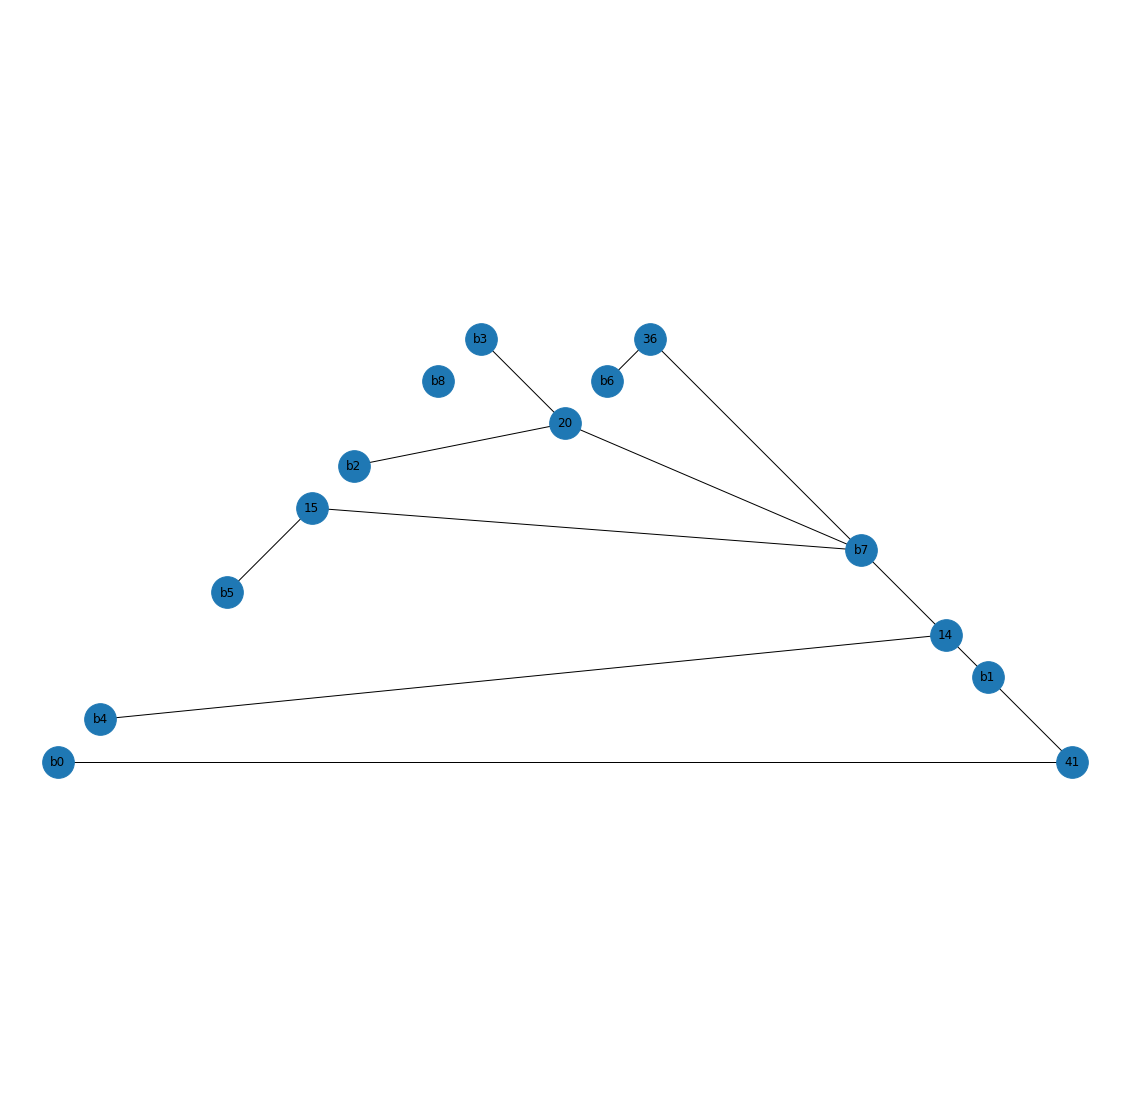

In [13]:
blocks = list(nx.biconnected_components(G))
print(blocks)
bctree = nx.Graph()
for i in range(len(blocks)):
    bctree.add_node('b'+str(i))
for i in range(1, G.number_of_nodes()+1):
    k = 0
    for j in range(len(blocks)):
        if str(i) in blocks[j]:
            k+=1
    if k>1:
        bctree.add_node(str(i))
        for j in range(len(blocks)):
            if str(i) in blocks[j]:
                bctree.add_edge(str(i), 'b'+str(j))
pos = nx.planar_layout(bctree)
plt.figure(figsize=(20,20))
plt.axis('equal')
nx.draw(bctree,pos, with_labels=True, node_size=1000)
plt.show()

Пункт m) Find all 2-edge-connected components of G∗.

In [16]:
print(list(nx.k_edge_components(G, 2)))

[{'43', '22', '33', '10', '20', '45', '21', '28', '3', '42', '31', '1', '5', '7', '13', '15', '16', '24', '36', '32', '23', '4', '25', '2', '39', '14', '41', '12', '35', '30', '17', '40', '38', '44', '6', '26', '8'}, {'9'}, {'11'}, {'18'}, {'19'}, {'27'}, {'29'}, {'34'}, {'37'}, {'46'}, {'47'}]


Пункт n) Construct an SPQR tree of the largest biconnected component of G.

Пункт o) Add the weight function 𝑤 : 𝐸 → R denoting the distance between capitals. Find the minimum (w.r.t. the total weight of edges) spanning tree 𝑇 for the maximum connected component of the weighted Europe graph G*𝑤 = (𝑉 , 𝐸, 𝑤).

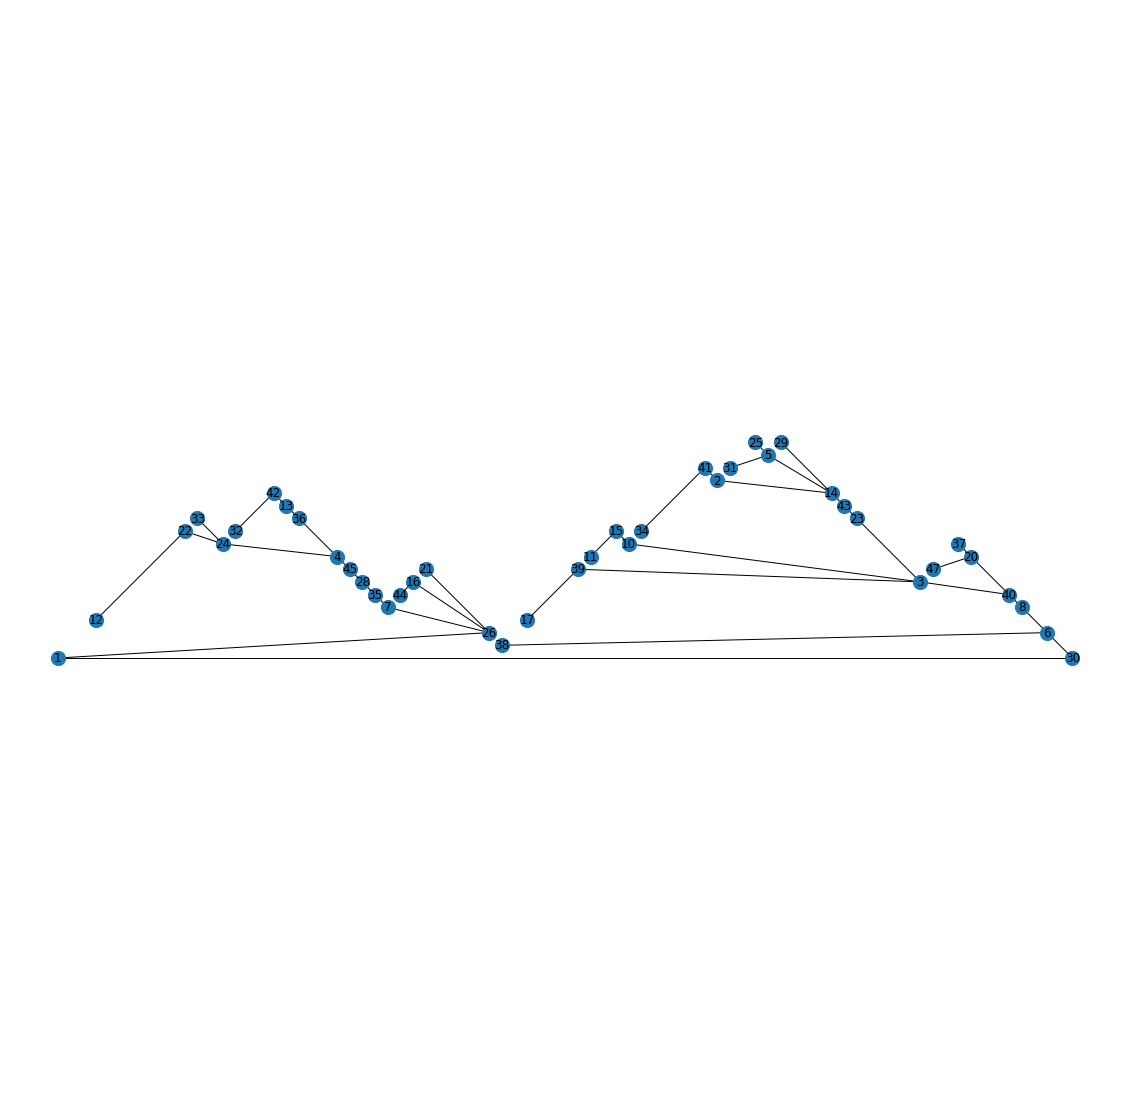

In [69]:
GW = nx.Graph()
for i in range(1, 48):
    GW.add_node(str(i))
fin3 = open("Country edges weight.txt", "r")
for i in range(88):
    a, b, c = map(str, fin3.readline().split())
    c = int(c)
    G.add_edge(a, b, weight=c)
GW_component = G.subgraph(max(nx.connected_components(G), key=len))
MST = nx.minimum_spanning_tree(GW_component)
pos = nx.planar_layout(MST)
plt.figure(figsize=(20,20))
plt.axis('equal')
nx.draw(MST,pos, with_labels=True, node_size=200)
plt.show()

Пункт p) Find centroid(𝑇) (w.r.t. the edge weight function 𝑤).

Пункт q) Construct the Prufer code for 𝑇.

In [70]:
convert = dict.fromkeys(list(map(str, range(1, 48))))
k = 1
lost_nodes = set()
for i in range(1, 48):
    if not str(i) in MST.nodes():
        lost_nodes.add(i)
        k+=1
    convert[str(i)] = i-k
MST = nx.relabel_nodes(MST, convert)
code = nx.to_prufer_sequence(MST)
print(code)
print(lost_nodes)

[13, 18, 8, 2, 34, 22, 20, 4, 12, 4, 12, 37, 20, 3, 36, 16, 5, 2, 1, 12, 38, 11, 31, 3, 40, 19, 2, 35, 14, 22, 23, 30, 6, 22, 0, 25, 5, 7, 35, 16]
{9, 46, 18, 19, 27}
